<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-Jan2023-Assignments/blob/main/Office_Hour_AA_data_exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objectives**

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of Magnimind and the slightly messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve:

**which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?**

A borough is just a fancy word for the district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London (here's some info for the curious). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

##**1. Sourcing and Loading**

### **1.1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

###**1.2. Loading the data**

In [2]:
dataset = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(dataset, sheet_name='Average price', index_col= None)

## **2. Cleaning, transforming, and visualizing**

###**2.1. Exploring your data** 

In [3]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            338 non-null    datetime64[ns]
 1   City of London        339 non-null    object        
 2   Barking & Dagenham    339 non-null    object        
 3   Barnet                339 non-null    object        
 4   Bexley                339 non-null    object        
 5   Brent                 339 non-null    object        
 6   Bromley               339 non-null    object        
 7   Camden                339 non-null    object        
 8   Croydon               339 non-null    object        
 9   Ealing                339 non-null    object        
 10  Enfield               339 non-null    object        
 11  Greenwich             339 non-null    object        
 12  Hackney               339 non-null    object        
 13  Hammersmith & Fulham

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [5]:
properties.isna().sum()

Unnamed: 0                1
City of London            0
Barking & Dagenham        0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith & Fulham      0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington & Chelsea      0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
Unnamed: 34             339
Inner London        

In [6]:
properties.shape

(339, 49)

In [7]:
missing = pd.concat([properties.isnull().sum(), 100*properties.isnull().mean()], axis=1)
missing.columns=['count', 'Percentage']
missing

,count,Percentage
Unnamed: 0,1,0.294985
City of London,0,0.000000
Barking & Dagenham,0,0.000000
Barnet,0,0.000000
Bexley,0,0.000000
Brent,0,0.000000
Bromley,0,0.000000
Camden,0,0.000000
Croydon,0,0.000000
Ealing,0,0.000000


In [8]:
properties['Unnamed: 0']

0            NaT
1     1995-01-01
2     1995-02-01
3     1995-03-01
4     1995-04-01
         ...    
334   2022-10-01
335   2022-11-01
336   2022-12-01
337   2023-01-01
338   2023-02-01
Name: Unnamed: 0, Length: 339, dtype: datetime64[ns]

In [9]:
df = properties.drop(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], axis = 1) 

In [10]:
df.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548


###**2.2. Cleaning the data**

In [11]:
propertiesT = df.transpose()
propertiesT.head()

,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604


In [12]:
propertiesT = propertiesT.reset_index()

In [13]:
new_header = propertiesT.iloc[0]
propertiesT = propertiesT[1:]
propertiesT.columns = new_header

propertiesT.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [14]:
propertiesT.rename(columns={'Unnamed: 0':'London_Borough',pd.NaT: 'ID'},inplace=True)

###**2.3.Transforming the data**

In [15]:
properties_melted = pd.melt(propertiesT, id_vars = ['London_Borough','ID'])

In [16]:
properties_melted.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [17]:
properties_melted.rename(columns={0:'Month','value': 'Average_Price'},inplace=True)
properties_melted.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [18]:
properties_melted['Average_Price'] = pd.to_numeric(properties_melted['Average_Price'])

In [19]:
properties_melted.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price            float64
dtype: object

###**2.4. Cleaning the data**

In [20]:
properties_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  15210 non-null  object        
 1   ID              15210 non-null  object        
 2   Month           15210 non-null  datetime64[ns]
 3   Average_Price   15210 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 475.4+ KB


In [21]:
properties_melted['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [22]:
properties_melted = properties_melted[(properties_melted.London_Borough != 'Unnamed: 34')\
                    & (properties_melted.London_Borough != 'Unnamed: 37')\
                    & (properties_melted.London_Borough != 'Unnamed: 47')]

In [23]:
properties_melted['London_Borough'].nunique()

45

In [24]:
nonBoroughs = ['City of London','Inner London','Outer London','NORTH EAST', 'NORTH WEST','YORKS & THE HUMBER','EAST MIDLANDS','WEST MIDLANDS','EAST OF ENGLAND','LONDON','SOUTH EAST','SOUTH WEST','England']

In [25]:
properties_melted = properties_melted[~properties_melted['London_Borough'].isin(nonBoroughs)]

In [26]:
properties_melted['London_Borough'].nunique()

32

In [27]:
properties_melted['ID'].isnull().values.any()

False

In [28]:
properties_melted['Average_Price'].isnull().values.any()

False

In [29]:
df = properties_melted
df

,London_Borough,ID,Month,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
...,...,...,...,...
15193,Sutton,E09000029,2023-02-01,447798.81270
15194,Tower Hamlets,E09000030,2023-02-01,502932.34100
15195,Waltham Forest,E09000031,2023-02-01,509781.86160
15196,Wandsworth,E09000032,2023-02-01,639194.17770


###**2.5. Visualizing the data**

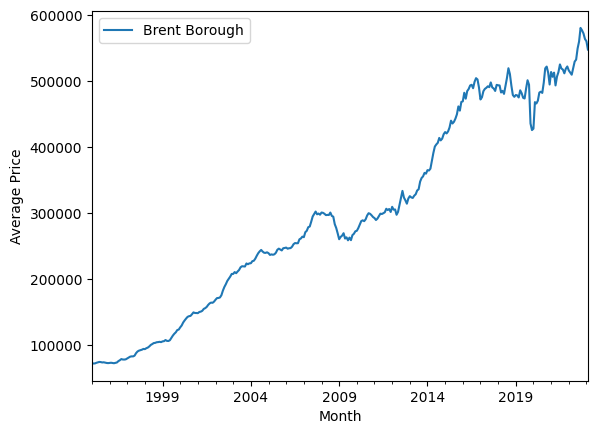

In [30]:
barnet_prices = df[df['London_Borough']=='Brent']
barnet_vis = barnet_prices.plot(kind='line',x='Month',y='Average_Price')
barnet_vis.set_xlabel('Month')
barnet_vis.set_ylabel('Average Price')
barnet_vis.legend(['Brent Borough'])

In [31]:
df['Year'] = df['Month'].apply(lambda x: x.year)

##**3. Modeling**

In [32]:
df_grouped = df.groupby(by=['London_Borough','Year']).mean()
df_grouped

<ipython-input-32-951591fac673>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(by=['London_Borough','Year']).mean()


Average_Price
London_Borough     Year               
Barking & Dagenham 1995   51817.969390
                   1996   51718.192690
                   1997   55974.262309
                   1998   60285.821083
                   1999   65320.934441
...                                ...
Westminster        2019  955998.608925
                   2020  960469.218567
                   2021  962777.447967
                   2022  999703.468367
                   2023  962494.345150

[928 rows x 1 columns]

In [33]:
df_grouped = df_grouped.reset_index()
df_grouped

,London_Borough,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441
...,...,...,...
923,Westminster,2019,955998.608925
924,Westminster,2020,960469.218567
925,Westminster,2021,962777.447967
926,Westminster,2022,999703.468367


In [34]:
def create_price_ratio(f):
    avg_price_1998 = float(f.loc[f['Year']==1998, 'Average_Price'])
    avg_price_2018 = float(f.loc[f['Year']==2018, 'Average_Price'])
    return [avg_price_2018/avg_price_1998]

In [35]:
ratios = {}
for borough in df_grouped['London_Borough'].unique():
    ratios[borough] = create_price_ratio(df_grouped[df_grouped['London_Borough']==borough])

In [36]:
df_ratios = pd.DataFrame(ratios)
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,4.2011,4.311451,4.263472,4.763036,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [37]:
df_ratiosT = df_ratios.transpose()
df_ratiosT = df_ratiosT.reset_index()
df_ratiosT.dtypes

index     object
0        float64
dtype: object

In [38]:
df_ratiosT.rename(columns={'index':'London_Borough',0: 'Housing_Ratio'},inplace=True)
df_ratiosT.sort_values('Housing_Ratio', ascending=False)

,London_Borough,Housing_Ratio
10,Hackney,6.198286
29,Waltham Forest,5.834756
26,Southwark,5.516485
21,Lewisham,5.449221
31,Westminster,5.353565
23,Newham,5.305390
12,Haringey,5.134625
18,Kensington & Chelsea,5.082465
20,Lambeth,4.957751
5,Camden,4.935353


In [39]:
top10= df_ratiosT.sort_values(by='Housing_Ratio',ascending=False).head(10)

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'Haringey'),
 Text(7, 0, 'Kensington & Chelsea'),
 Text(8, 0, 'Lambeth'),
 Text(9, 0, 'Camden')]

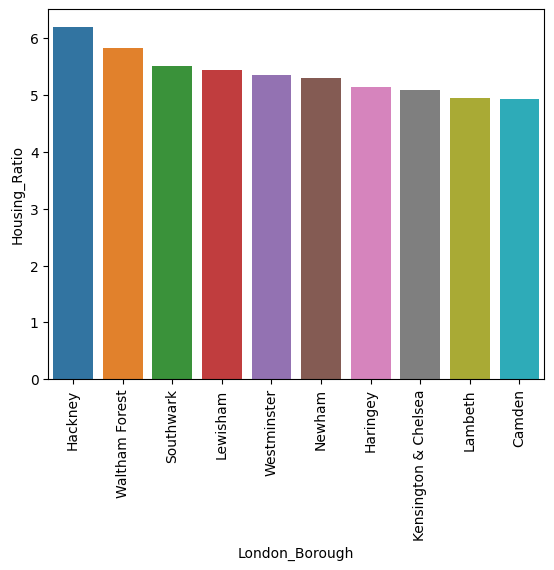

In [40]:
top10= df_ratiosT.sort_values(by='Housing_Ratio',ascending=False).head(10)
plotting = sns.barplot(data=top10, x='London_Borough', y='Housing_Ratio')
plotting.set_xticklabels(top10.London_Borough, rotation=90)

In [41]:
ratio= df_ratiosT.sort_values(by='Housing_Ratio',ascending=False)

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'Haringey'),
 Text(7, 0, 'Kensington & Chelsea'),
 Text(8, 0, 'Lambeth'),
 Text(9, 0, 'Camden'),
 Text(10, 0, 'Barking & Dagenham'),
 Text(11, 0, 'Brent'),
 Text(12, 0, 'Islington'),
 Text(13, 0, 'Greenwich'),
 Text(14, 0, 'Wandsworth'),
 Text(15, 0, 'Merton'),
 Text(16, 0, 'Tower Hamlets'),
 Text(17, 0, 'Redbridge'),
 Text(18, 0, 'Barnet'),
 Text(19, 0, 'Havering'),
 Text(20, 0, 'Ealing'),
 Text(21, 0, 'Kingston upon Thames'),
 Text(22, 0, 'Enfield'),
 Text(23, 0, 'Bexley'),
 Text(24, 0, 'Croydon'),
 Text(25, 0, 'Hillingdon'),
 Text(26, 0, 'Hammersmith & Fulham'),
 Text(27, 0, 'Sutton'),
 Text(28, 0, 'Bromley'),
 Text(29, 0, 'Harrow'),
 Text(30, 0, 'Richmond upon Thames'),
 Text(31, 0, 'Hounslow')]

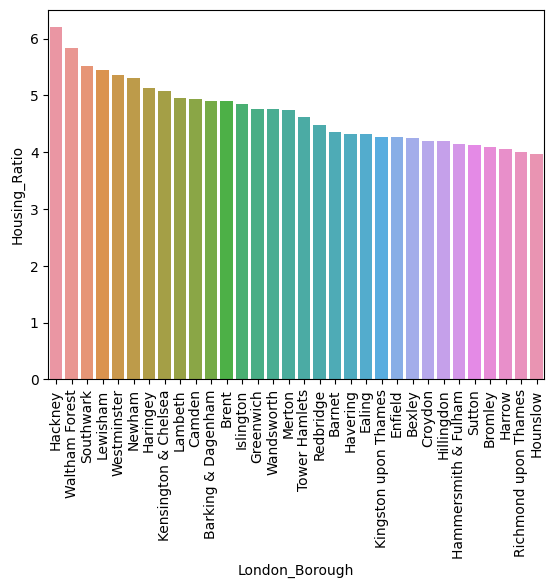

In [42]:
ratio= df_ratiosT.sort_values(by='Housing_Ratio',ascending=False)
plotting = sns.barplot(data=ratio, x='London_Borough', y='Housing_Ratio')
plotting.set_xticklabels(ratio.London_Borough, rotation=90)

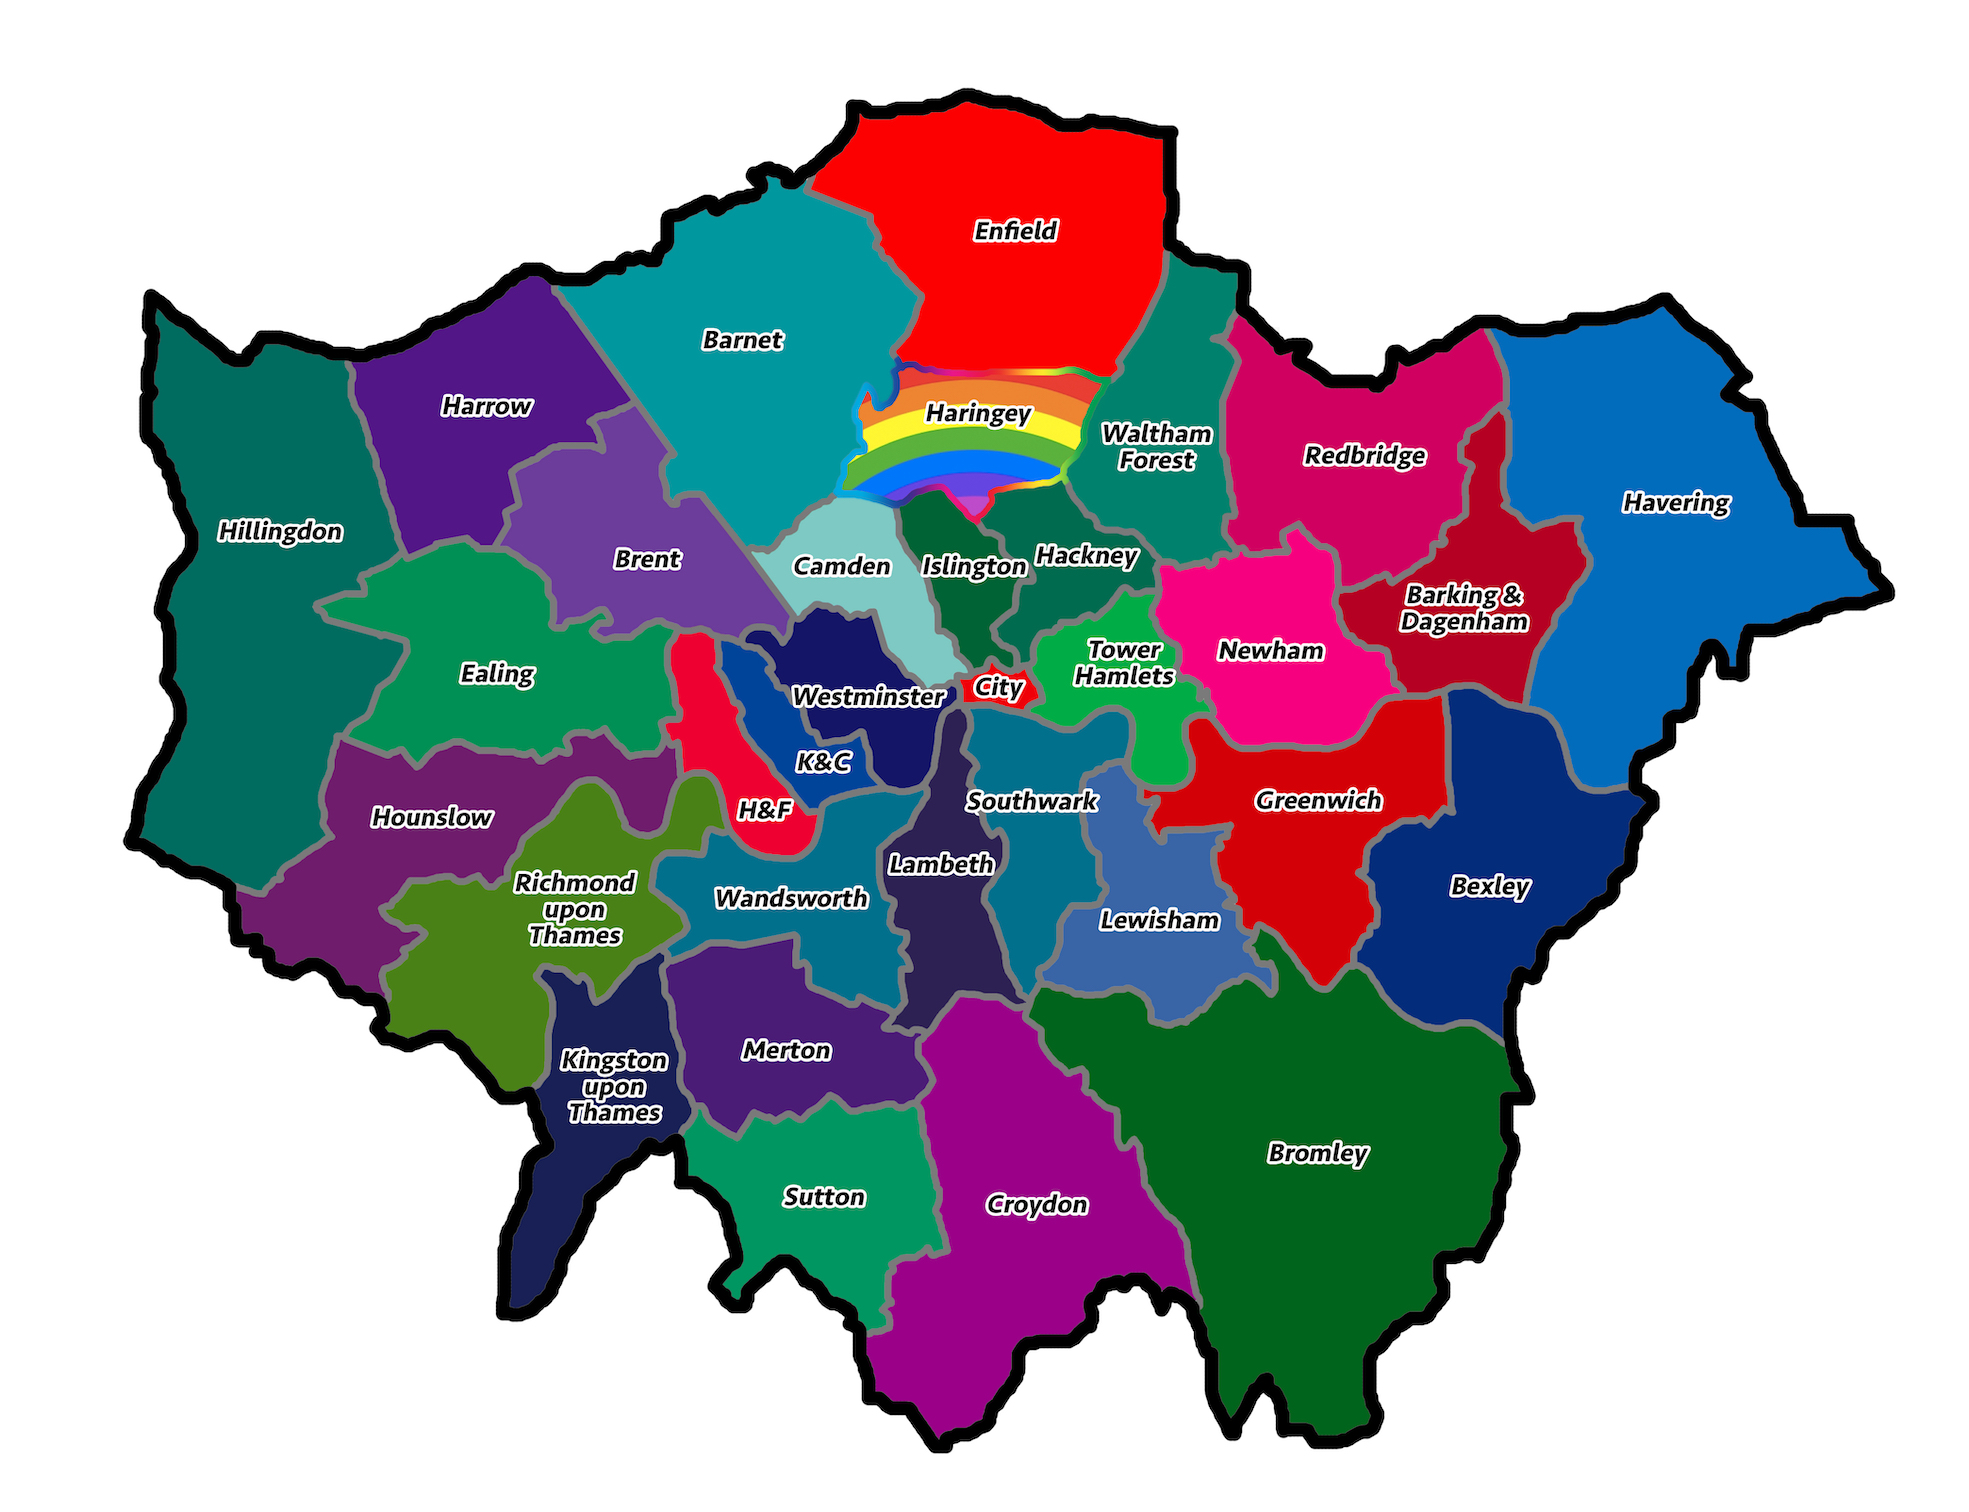

## **4. Conclusion**

We can draw some conclusions about the trends in house prices in different boroughs of London:

1. The most expensive boroughs tend to be in central London.
2. The least expensive boroughs tend to be in the outer areas of London, such as Barking & Dagenham and Bexley.
3. The ratio of house prices to household income also varies significantly across London boroughs, with some boroughs having much higher ratios than others.
4. There is a general trend of higher house prices and higher housing ratios in boroughs closer to central London.


Overall, the analysis suggests that London's housing market is complex and can vary significantly depending on the borough. There is a general trend of higher prices and ratios in central boroughs, while outer boroughs tend to be more affordable.







#**OFFICE HOUR**

###**1.2. Loading the data**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [47]:
dataset = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(dataset, sheet_name='Average price', index_col= None)

2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy:

Each variable has a column.
Each observation forms a row.
Keep the end goal in mind as you move through this process, every step will take you closer.

Hint: This part of the data science pipeline should test those skills you acquired in:

Intermediate Python for data science, all modules.
pandas Foundations, all modules.
Manipulating DataFrames with pandas, all modules.
Data Types for Data Science, Module Four.
Python Data Science Toolbox - Part One, all modules

2.1. Exploring your data

Think about your pandas functions for checking out a dataframe.

In [48]:
properties.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Columns: 49 entries, Unnamed: 0 to England
dtypes: datetime64[ns](1), float64(3), object(45)
memory usage: 129.9+ KB


In [49]:
properties.columns.tolist()

['Unnamed: 0',
 'City of London',
 'Barking & Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith & Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington & Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster',
 'Unnamed: 34',
 'Inner London',
 'Outer London',
 'Unnamed: 37',
 'NORTH EAST',
 'NORTH WEST',
 'YORKS & THE HUMBER',
 'EAST MIDLANDS',
 'WEST MIDLANDS',
 'EAST OF ENGLAND',
 'LONDON',
 'SOUTH EAST',
 'SOUTH WEST',
 'Unnamed: 47',
 'England']

In [50]:
properties.head(3)

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549


The data is composed borughs as columns and dates as rows

In [51]:
drop_cols = [col for col in properties.columns if col[0:7] in 'Unnamed:']
properties[drop_cols].isnull().sum()*100/len(properties)

Unnamed: 0       0.294985
Unnamed: 34    100.000000
Unnamed: 37    100.000000
Unnamed: 47    100.000000
dtype: float64

we will drop the missing values after transforming the data frame.

In [52]:
#drop_cols.remove('Unnamed: 0')
#properties.drop(columns=drop_cols, inplace=True)
#[col for col in properties.columns if col[0:7] in 'Unnamed:']
#properties.columns.tolist()

2.2. Cleaning the data

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You also might find you need to assign the values of the first row to your column headings. (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help with this.

In [53]:
#transpose the dataframe
properties = properties.T
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604


In [54]:
#assign the values of the first row to the column heading
properties.columns = properties.iloc[0].values
properties.head()

,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604


In [55]:
#drop the first row
properties.drop(index=properties.index[0], inplace=True)
properties.head()

,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [56]:
#reset the index
properties.reset_index(inplace=True)
properties.head()

,index,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
0,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
1,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
2,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
3,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
4,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [57]:
#let's drop Nat
properties.drop(columns=properties.columns.tolist()[1], inplace=True)
#properties.index.name=None
#properties.reindex(None)
properties.head()

,index,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
0,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
1,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
2,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
3,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
4,Brent,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


**2.3. Cleaning the data (part 2)**

You might we have to rename a couple columns. How do you do this? The clue's pretty bold...

In [58]:
properties.rename(columns={'index':'boroughs'}, inplace=True)
#properties.rename(columns={'index': 'boroughs',
#                           properties.columns.tolist()[1]:'ID'}, inplace=True)
properties.head()

,boroughs,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
0,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
1,Barking & Dagenham,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
2,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
3,Bexley,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
4,Brent,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,73789.54287,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


**2.4. Transforming the data**

Remember what Wes McKinney said about tidy data?

You might need to melt your DataFrame here.

​
Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers...

In [59]:
properties=properties.melt(id_vars='boroughs')
properties.head()

,boroughs,variable,value
0,City of London,1995-01-01,91448.98487
1,Barking & Dagenham,1995-01-01,50460.2266
2,Barnet,1995-01-01,93284.51832
3,Bexley,1995-01-01,64958.09036
4,Brent,1995-01-01,71306.56698


In [60]:
properties.groupby('boroughs').head(1)

,boroughs,variable,value
0,City of London,1995-01-01,91448.98487
1,Barking & Dagenham,1995-01-01,50460.2266
2,Barnet,1995-01-01,93284.51832
3,Bexley,1995-01-01,64958.09036
4,Brent,1995-01-01,71306.56698
5,Bromley,1995-01-01,81671.47692
6,Camden,1995-01-01,120932.8881
7,Croydon,1995-01-01,69158.16225
8,Ealing,1995-01-01,79885.89069
9,Enfield,1995-01-01,72514.69096


In [61]:
properties.groupby('boroughs').head(2)

,boroughs,variable,value
0,City of London,1995-01-01,91448.98487
1,Barking & Dagenham,1995-01-01,50460.2266
2,Barnet,1995-01-01,93284.51832
3,Bexley,1995-01-01,64958.09036
4,Brent,1995-01-01,71306.56698
...,...,...,...
91,LONDON,1995-02-01,72777.93709
92,SOUTH EAST,1995-02-01,63715.02399
93,SOUTH WEST,1995-02-01,54356.14843
94,Unnamed: 47,1995-02-01,NaN


In [62]:
#properties.ID.nunique()*100/len(properties)
#len(properties/ID.value_counts()) == len(properties.boroughs.value_counts())


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers...

In [63]:
properties.rename(columns={'variable': 'Date',
                           'value': 'Price'}, inplace=True)

In [64]:
properties.head()

,boroughs,Date,Price
0,City of London,1995-01-01,91448.98487
1,Barking & Dagenham,1995-01-01,50460.2266
2,Barnet,1995-01-01,93284.51832
3,Bexley,1995-01-01,64958.09036
4,Brent,1995-01-01,71306.56698


In [69]:
properties.dtypes

boroughs            object
Date        datetime64[ns]
Price              float64
dtype: object

In [75]:
properties['Price'] = properties['Price'].astype(float)

In [76]:
properties.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15210 entries, 0 to 16223
Columns: 3 entries, boroughs to Price
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 475.3+ KB


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column?

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit.

In [77]:
properties.isnull().sum()

boroughs    0
Date        0
Price       0
dtype: int64

In [78]:
properties.dropna(inplace=True)

In [79]:
properties.isnull().sum()

boroughs    0
Date        0
Price       0
dtype: int64

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [80]:
#properties.set_index['Date', drop=True, inplace=True]
properties.set_index('Date', drop=True, inplace=True)


In [81]:
properties.head(3)

,boroughs,Price
Date,,
1995-01-01,City of London,91448.98487
1995-01-01,Barking & Dagenham,50460.22660
1995-01-01,Barnet,93284.51832


<Axes: xlabel='Date'>

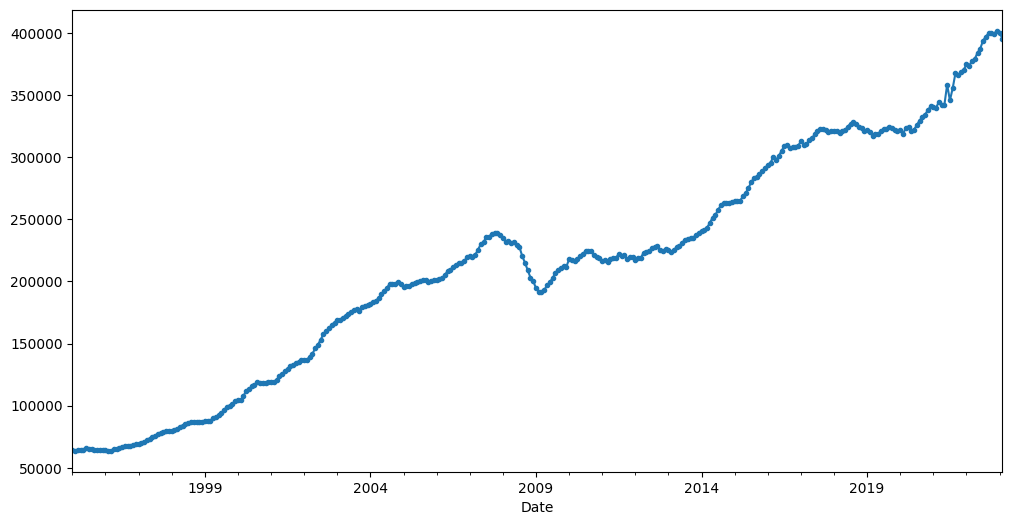

In [91]:
plt.figure(figsize=(12,6))
properties[properties['boroughs'] == 'SOUTH EAST']['Price'].plot(kind = 'line', style='.-')

<Axes: xlabel='Date'>

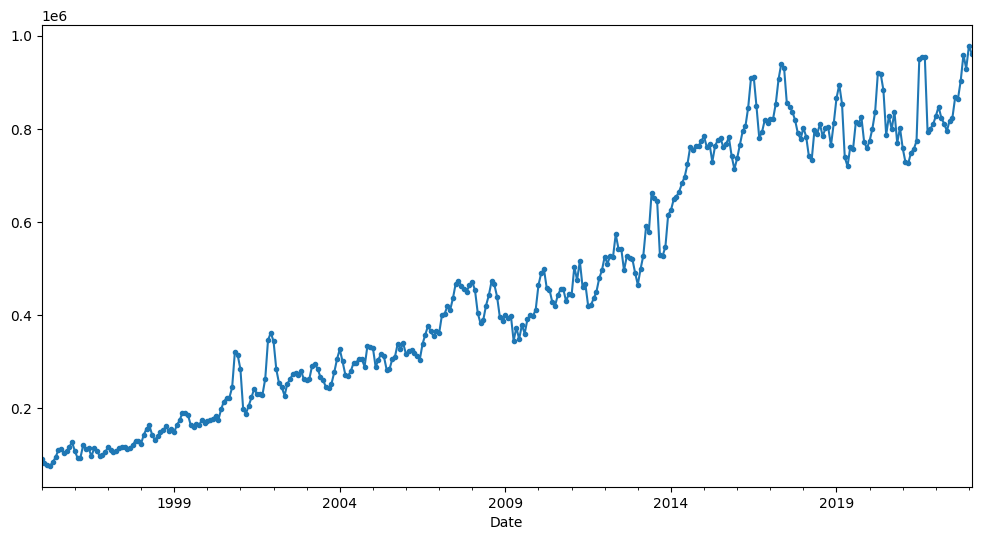

In [90]:
plt.figure(figsize=(12,6))
properties[properties['boroughs'] == 'City of London']['Price'].plot(kind = 'line', style='.-')

<Axes: xlabel='Date'>

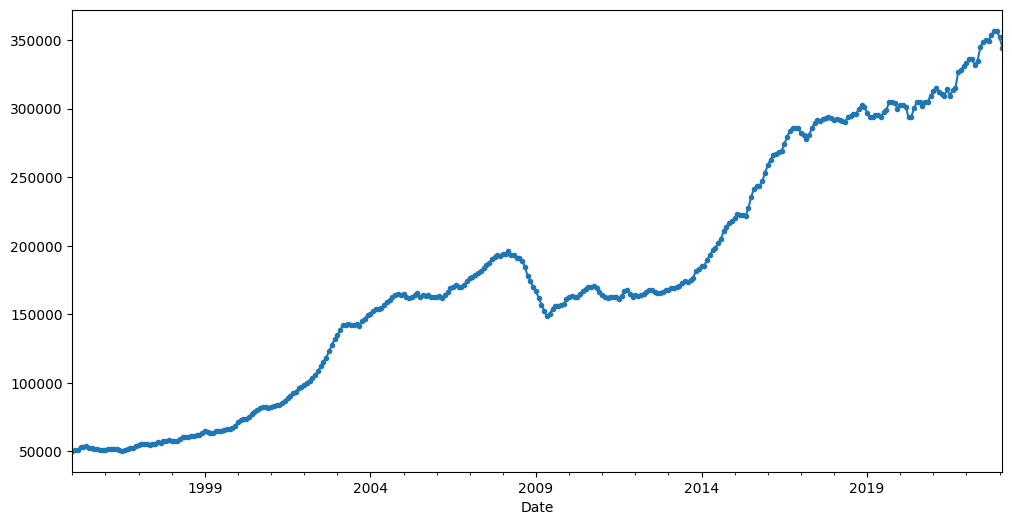

In [92]:

plt.figure(figsize=(12,6))
properties[properties['boroughs'] == 'Barking & Dagenham']['Price'].plot(kind = 'line', style='.-')

To limit the number of data points you have, you might want to extract the year from every month value your Month column.

To this end, you could apply a lambda function. Your logic could work as follows:

look through the Month column
extract the year from each individual value in that column
store that corresponding year as separate column.
Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades?

In [93]:
properties.reset_index(inplace=True)

In [98]:
f = lambda x: x.year
properties['Year'] = properties['Date'].map(f)

In [95]:
properties['Year'] = properties['Date'].apply(lambda x: x.year).head()

In [99]:
properties.head()

,Date,boroughs,Price,Year
0,1995-01-01,City of London,91448.98487,1995
1,1995-01-01,Barking & Dagenham,50460.22660,1995
2,1995-01-01,Barnet,93284.51832,1995
3,1995-01-01,Bexley,64958.09036,1995
4,1995-01-01,Brent,71306.56698,1995


In [100]:
properties.sample(n=10, axis=0)

,Date,boroughs,Price,Year
10872,2015-02-01,Southwark,444793.79500,2015
11419,2016-02-01,Outer London,400430.58480,2016
4898,2004-01-01,EAST MIDLANDS,119410.69460,2004
13857,2020-08-01,SOUTH EAST,329549.83570,2020
7463,2008-10-01,EAST MIDLANDS,140154.76140,2008
14980,2022-09-01,EAST OF ENGLAND,359270.71530,2022
12816,2018-09-01,NORTH WEST,163068.07329,2018
5915,2005-12-01,Kingston upon Thames,251129.57850,2005
10784,2014-12-01,Tower Hamlets,404510.93430,2014
8500,2010-09-01,EAST OF ENGLAND,195063.14250,2010


<Axes: >

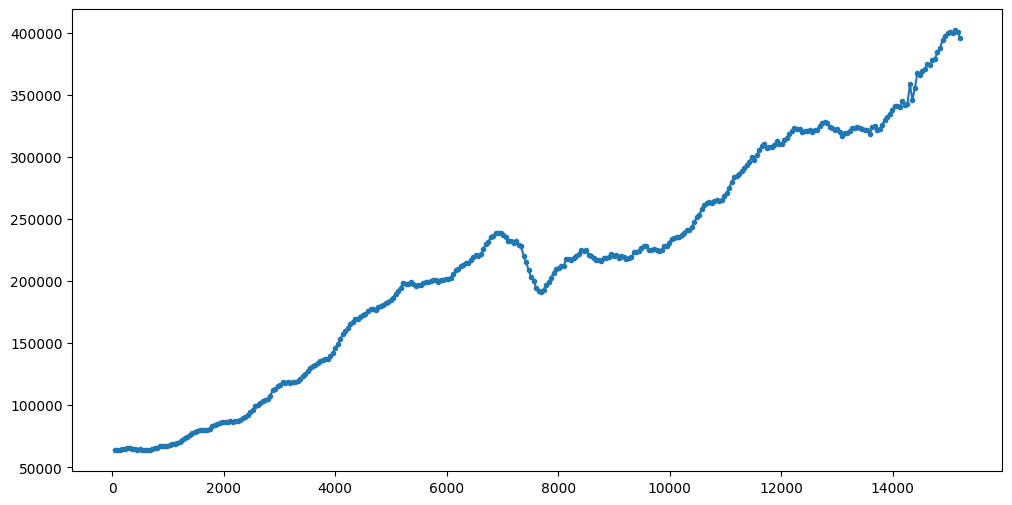

In [97]:
plt.figure(figsize=(12,6))
properties[properties['boroughs'] == 'SOUTH EAST']['Price'].plot(kind = 'line', style='.-')

<Axes: xlabel='Year'>

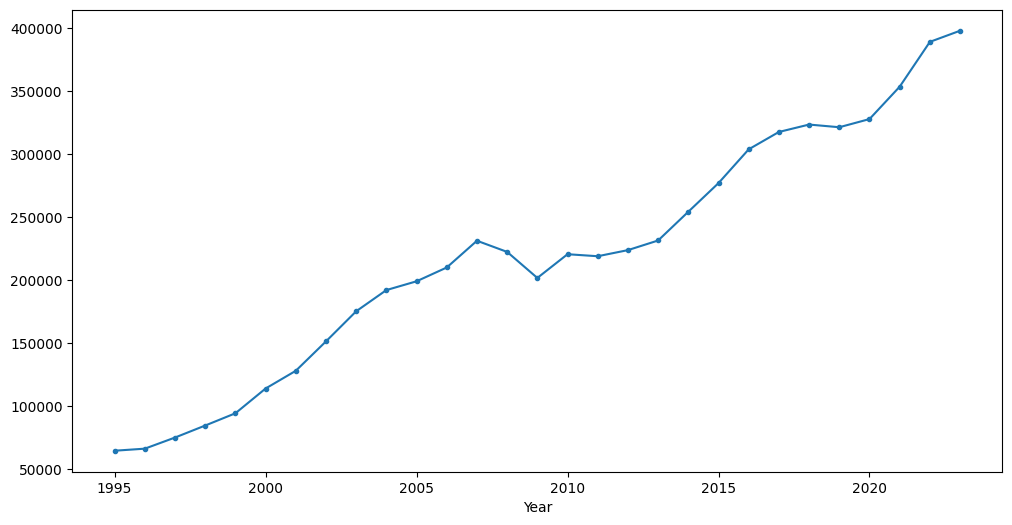

In [105]:
plt.figure(figsize=(12,6))
properties[properties['boroughs'] == 'SOUTH EAST'].groupby('Year')['Price'].mean().plot(kind='line', style='.-')

###**3. Modeling**
Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:

Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
Get the Average Price for that Borough, for the years 1998 and 2018.
Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
Return that ratio.
Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great!

Hint: This section should test the skills you acquired in:

Python Data Science Toolbox - Part One, all modules

In [106]:
def create_price_ratio (dataframe, borough_name, start_date, end_date):
  ave_1 = properties[(properties['boroughs'] == borough_name) & (properties['Year'] == start_date)]['Price'].mean()
  ave_2 = properties[(properties['boroughs'] == borough_name) & (properties['Year'] == end_date)]['Price'].mean()

  ratio = ave_1/ave_2
  return ratio

create_price_ratio(properties, 'Camden', 1998, 2018)

0.20261973503252542

In [107]:
create_price_ratio(properties, 'Southwark', 1998, 2018)

0.18127484171283462